In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# data directory
data_dir = "../Dades-Notes/"

In [3]:
#Importem el dataset
df_sise = pd.read_csv(data_dir+"SisePrim.csv", low_memory=False) 
df_sise = df_sise.replace(',', '.', regex=True)

In [4]:
#Canviem el nom de les columnes
df_sise = df_sise.rename(columns={'PCAT': 'Llengua Catalana'})
df_sise = df_sise.rename(columns={'PCAST': 'Llengua Castellana'})
df_sise = df_sise.rename(columns={'PANG': 'Llengua Anglesa'})
df_sise = df_sise.rename(columns={'PMAT': 'Matemàtiques'})

In [5]:
#Canviem els tipus de variables de manera que hi puguem treballar
df_sise['ANY'] = df_sise['ANY'].astype(str)
df_sise['Llengua Catalana'] = df_sise['Llengua Catalana'].astype(float)
df_sise['Llengua Castellana'] = df_sise['Llengua Castellana'].astype(float)
df_sise['Llengua Anglesa'] = df_sise['Llengua Anglesa'].astype(float)
df_sise['Matemàtiques'] = df_sise['Matemàtiques'].astype(float)
df_sise['PMED'] = df_sise['PMED'].astype(float)

In [6]:
#Busquem els màxims i mínims absolutes de les mitjanes en les assignatures per tal d'uniformitzar els colormaps
df_tmp2 = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Llengua Catalana', 'Llengua Castellana', 'Llengua Anglesa', 'Matemàtiques']].mean(numeric_only=True).reset_index()
Assignatures = ["Llengua Catalana","Llengua Castellana","Llengua Anglesa","Matemàtiques"]
min_value = []
max_value = []
for i in range(len(Assignatures)):
    min_value.append(df_tmp2[Assignatures[i]].min())
    max_value.append(df_tmp2[Assignatures[i]].max())
abs_min = min(min_value)
abs_max = max(max_value)

In [7]:
#Fem un dataset que contingui només les notes d'una de les assignatures
df_cat = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Llengua Catalana']].mean(numeric_only=True).reset_index()
df_cast = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Llengua Castellana']].mean(numeric_only=True).reset_index()
df_ang = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Llengua Anglesa']].mean(numeric_only=True).reset_index()
df_mat = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Matemàtiques']].mean(numeric_only=True).reset_index()

In [8]:
df_meltedcat = df_cat.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Assignatura', value_name='Grade')
df_meltedcast = df_cast.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Assignatura', value_name='Grade')
df_meltedang = df_ang.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Assignatura', value_name='Grade')
df_meltedmat = df_mat.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Assignatura', value_name='Grade')

In [9]:
#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en el català
df_meltedcat['ANY'] = df_meltedcat['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedcat['ANY'] = df_meltedcat['ANY'].replace(year, str(i), regex=True)
    
#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en el castellà
df_meltedcast['ANY'] = df_meltedcast['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedcast['ANY'] = df_meltedcast['ANY'].replace(year, str(i), regex=True)

#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en l'anglès
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedang['ANY'] = df_meltedang['ANY'].replace(year, str(i), regex=True)

#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en les matemàtiques
df_meltedmat['ANY'] = df_meltedmat['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedmat['ANY'] = df_meltedmat['ANY'].replace(year, str(i), regex=True)

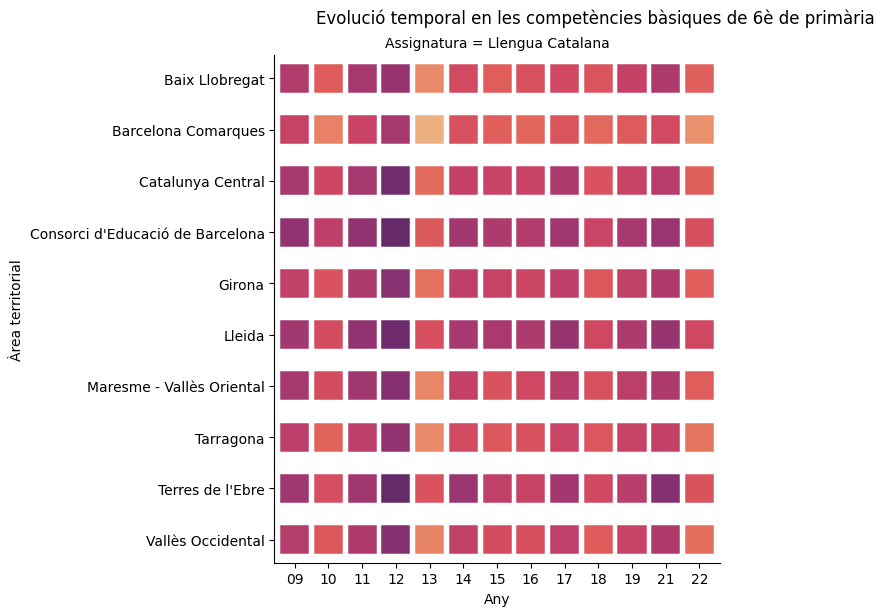

In [10]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='flare', as_cmap=True)
g = sns.FacetGrid(df_meltedcat, col="Assignatura", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Any", "Àrea territorial")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
plt.show()

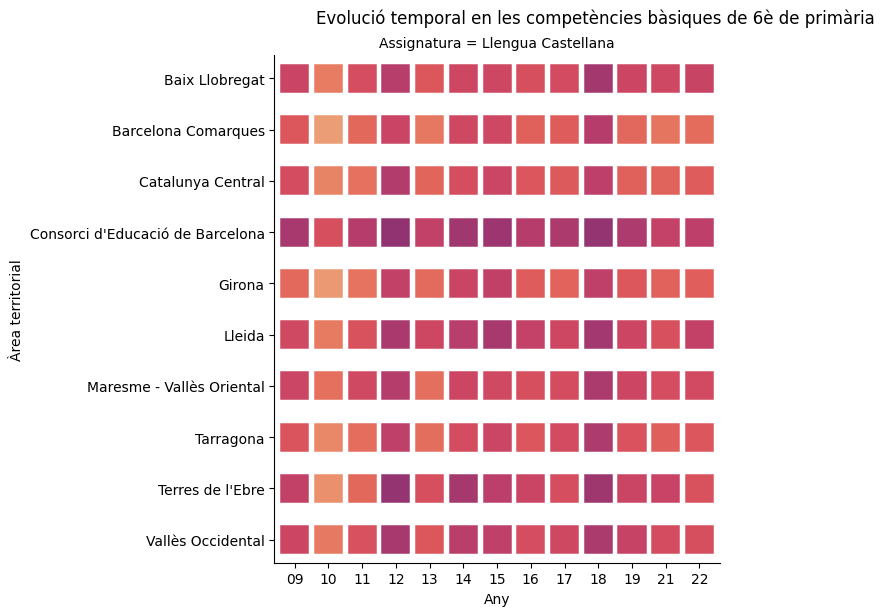

In [11]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='flare', as_cmap=True)
g = sns.FacetGrid(df_meltedcast, col="Assignatura", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Any", "Àrea territorial")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
plt.show()

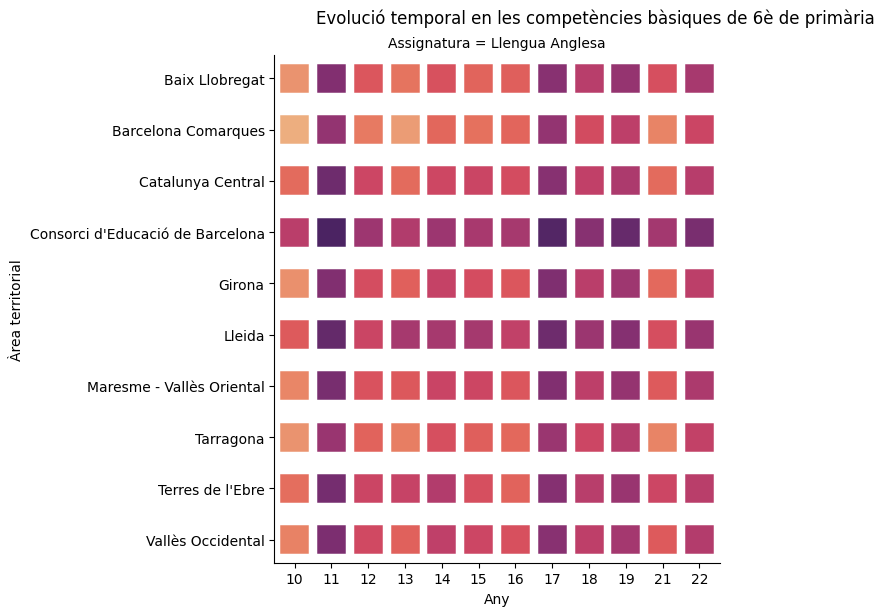

In [12]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='flare', as_cmap=True)
g = sns.FacetGrid(df_meltedang, col="Assignatura", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Any", "Àrea territorial")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
plt.show()

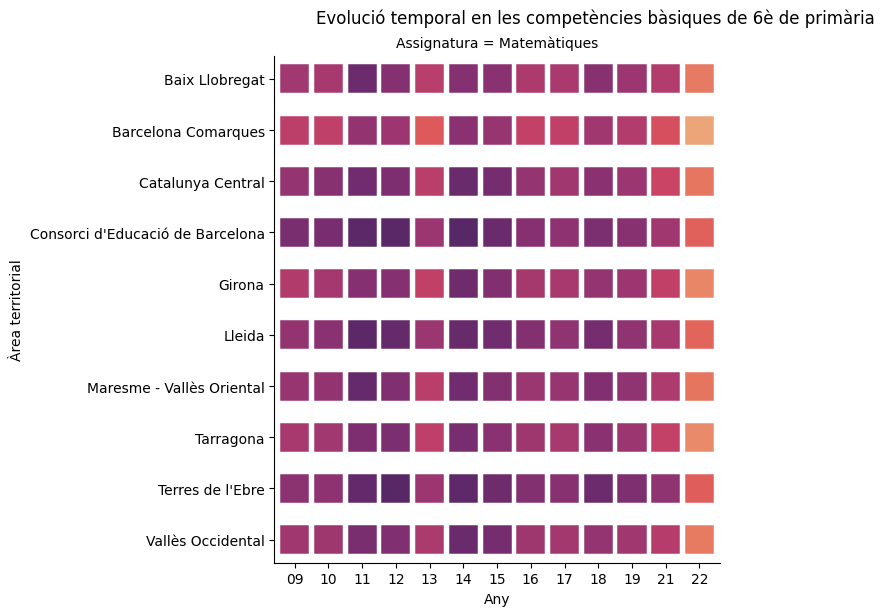

In [13]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='flare', as_cmap=True)
g = sns.FacetGrid(df_meltedmat, col="Assignatura", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Any", "Àrea territorial")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
plt.show()